In [1]:
import io
import umap
import joblib
from misc import *
import numpy as np
import pandas as pd
import pickle as pkl
from tqdm import tqdm
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from scipy.stats import pearsonr, spearmanr

In [3]:
np.random.seed(10)

In [4]:
data = pd.read_csv("english.csv")

In [5]:
X = data.values[:,1:-1]
Y = data.values[:,-1:].reshape(-1,)

In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

In [7]:
aug_X_1 = train_X * np.random.normal(size=train_X.shape)#, loc=np.mean(train_X), scale=np.std(train_X))
aug_X_2 = train_X * np.random.normal(size=train_X.shape)#, loc=np.mean(train_X), scale=np.std(train_X))
aug_X_3 = train_X * np.random.normal(size=train_X.shape)#, loc=np.mean(train_X), scale=np.std(train_X))

In [8]:
train_X = np.concatenate([train_X, aug_X_1, aug_X_2, aug_X_3]).astype(np.float32)
train_Y = np.concatenate([train_Y, train_Y, train_Y, train_Y]).astype(np.float32)

In [9]:
tpot = TPOTRegressor(
    generations=20, population_size=5, verbosity=2, scoring="neg_mean_absolute_error", cv=10,
    config_dict="TPOT light"
)
tpot.fit(train_X, train_Y)

Generation 1 - Current best internal CV score: -0.09262286788381266
Generation 2 - Current best internal CV score: -0.09262286788381266
Generation 3 - Current best internal CV score: -0.09245038830945948
Generation 4 - Current best internal CV score: -0.08985644995813269
Generation 5 - Current best internal CV score: -0.08985644995813269
Generation 6 - Current best internal CV score: -0.08985644995813269
Generation 7 - Current best internal CV score: -0.08985644995813269
Generation 8 - Current best internal CV score: -0.08985644995813269
Generation 9 - Current best internal CV score: -0.0868466848376889
Generation 10 - Current best internal CV score: -0.0868466848376889
Generation 11 - Current best internal CV score: -0.0868466848376889
Generation 12 - Current best internal CV score: -0.0868466848376889
Generation 13 - Current best internal CV score: -0.0868466848376889
Generation 14 - Current best internal CV score: -0.07935910993520054
Generation 15 - Current best internal CV score: 

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=10,
              disable_update_check=False, early_stop=None, generations=20,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=5,
              random_state=None, scoring='neg_mean_absolute_error',
              subsample=1.0, template=None, use_dask=False, verbosity=2,
              warm_start=False)

In [10]:
train_Yhat = tpot.fitted_pipeline_.predict(train_X)

In [11]:
test_Yhat = tpot.fitted_pipeline_.predict(test_X)

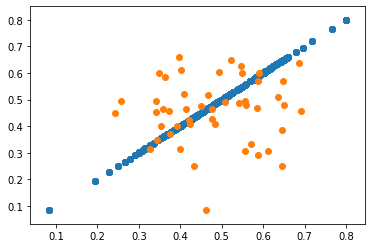

In [12]:
plt.scatter(train_Y, train_Yhat)
plt.scatter(test_Y, test_Yhat)

In [13]:
aug_Xt_1 = test_X*np.random.normal(size=test_X.shape)
aug_Xt_2 = test_X*np.random.normal(size=test_X.shape)
aug_Xt_3 = test_X*np.random.normal(size=test_X.shape)

In [14]:
augm_X = np.concatenate([test_X, aug_Xt_1, aug_Xt_2, aug_Xt_3])
augm_Y = np.concatenate([test_Y, test_Y, test_Y, test_Y])

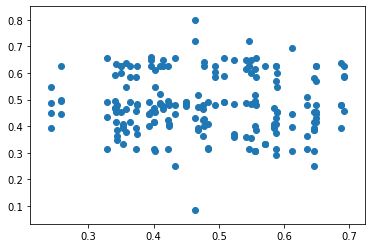

In [15]:
plt.scatter(augm_Y, tpot.fitted_pipeline_.predict(augm_X))

In [16]:
spearmanr(test_Y, tpot.fitted_pipeline_.predict(test_X))

SpearmanrResult(correlation=0.08933629570351088, pvalue=0.5415750688409477)

In [17]:
pearsonr(test_Y, tpot.fitted_pipeline_.predict(test_X))

(0.055524043628909316, 0.7047418685340882)